## **1. Install Dependencies and Setup**

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
len(tf.config.list_physical_devices('GPU'))

1

## **2. Remove dodgy images**

In [4]:
import cv2
import imghdr


In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
from zipfile import ZipFile
file_name="data.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [8]:
os.listdir(data_dir)

['dog', 'cat']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data/dog/4a4c800d5af56e0cd00edc9a86e06ae345-11-puppies.rsquare.w700.jpg
Image not in ext list data/dog/IMG_6316.JPG.jpg
Image not in ext list data/dog/c00af5ed-1a33-43bd-9162-3306ec4387a4-65-American-Eskimo990000004864886.jpg
Image not in ext list data/dog/Goldendoodlepuppies.jpg
Image not in ext list data/cat/95575-AmazonPets_Mobile-CatStore-EN_copy.jpg
Image not in ext list data/cat/Abyssinian-sorrel.jpg
Image not in ext list data/cat/cat-toes-paw-number-paws-tiger-tabby.jpg
Image not in ext list data/cat/p07ryyyj.jpg
Image not in ext list data/cat/Himalayan-chocolate-point.jpg
Image not in ext list data/cat/shop-everything-cats.gif
Image not in ext list data/cat/f6b06b632d5369a70e6fc0240ca005cbd9-bic-kitty-litter.jpg


## **3. Load Data**

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 176 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
batch = data_iterator.next()

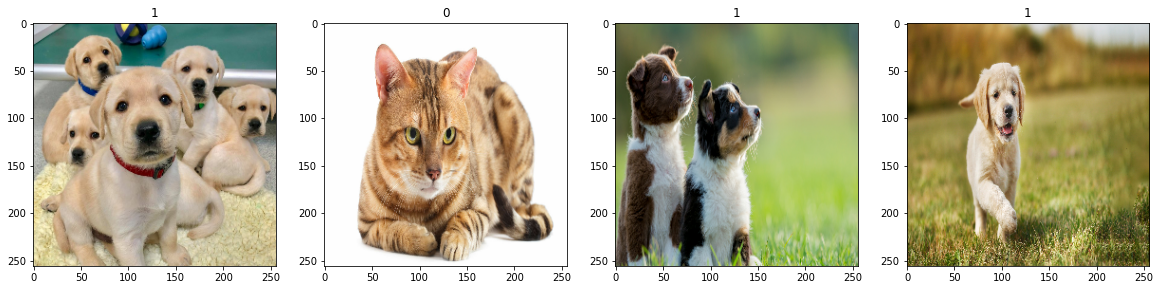

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
#0 --> cat
#1-->dog

## **4. Scale Data**

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
r=data.as_numpy_iterator().next()

In [18]:
r

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607

# **5. Split Data**

In [19]:
train_size = int(len(data)*(4/6))
val_size = int(len(data)*(1/6))
test_size = int(len(data)*(1/6))

In [20]:
len(data)

6

In [21]:
train_size

4

In [22]:
val_size

1

In [23]:
test_size

1

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## **6. Build Deep Learning Model**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

## **7. Train**

In [30]:
logdir='logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [32]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

In [33]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback, early_stopping_cb])

Epoch 1/20
4/4 [==============================] - 10s 1s/step - loss: 0.7380 - accuracy: 0.5625 - val_loss: 0.7225 - val_accuracy: 0.4688
Epoch 2/20
4/4 [==============================] - 9s 2s/step - loss: 0.7036 - accuracy: 0.5000 - val_loss: 0.6867 - val_accuracy: 0.5625
Epoch 3/20
4/4 [==============================] - 9s 2s/step - loss: 0.6856 - accuracy: 0.6016 - val_loss: 0.6893 - val_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 7s 1s/step - loss: 0.7086 - accuracy: 0.4688 - val_loss: 0.6808 - val_accuracy: 0.5000
Epoch 5/20
4/4 [==============================] - 7s 1s/step - loss: 0.6779 - accuracy: 0.6250 - val_loss: 0.6743 - val_accuracy: 0.6250
Epoch 6/20
4/4 [==============================] - 7s 1s/step - loss: 0.6734 - accuracy: 0.5625 - val_loss: 0.6525 - val_accuracy: 0.6562
Epoch 7/20
4/4 [==============================] - 9s 2s/step - loss: 0.6519 - accuracy: 0.6250 - val_loss: 0.6422 - val_accuracy: 0.7500
Epoch 8/20
4/4 [========================

## **8. Plot Performance**

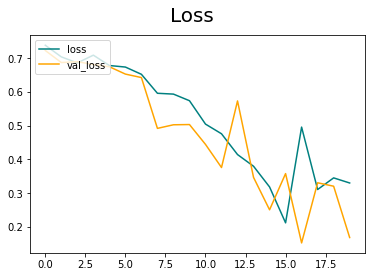

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

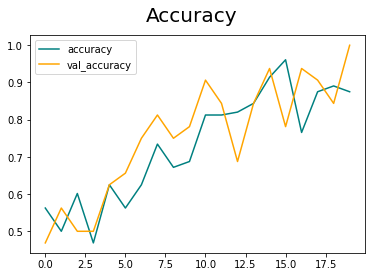

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## **9. Evaluate**

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 258ms/step


In [39]:
test.as_numpy_iterator()

In [40]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    print(batch)

(array([[[[0.88086706, 0.94361216, 0.9004749 ],
         [0.8906019 , 0.953347  , 0.9102098 ],
         [0.8980392 , 0.9607843 , 0.91764706],
         ...,
         [0.872296  , 0.9036685 , 0.9154332 ],
         [0.8310199 , 0.85894585, 0.88105035],
         [0.7915287 , 0.8189797 , 0.8503522 ]],

        [[0.8838007 , 0.9465458 , 0.9034085 ],
         [0.8921109 , 0.954856  , 0.9117187 ],
         [0.8980392 , 0.9607843 , 0.91764706],
         ...,
         [0.86802953, 0.8994021 , 0.9082486 ],
         [0.8561879 , 0.88704705, 0.90035206],
         [0.85176146, 0.87921244, 0.9076896 ]],

        [[0.88916206, 0.95190716, 0.9087699 ],
         [0.89651453, 0.9592596 , 0.9161224 ],
         [0.8985287 , 0.9612738 , 0.91813654],
         ...,
         [0.89192706, 0.91059285, 0.92047334],
         [0.88363254, 0.9022983 , 0.9155876 ],
         [0.87544453, 0.8931682 , 0.9157555 ]],

        ...,

        [[0.62352943, 0.00784314, 0.03529412],
         [0.63481206, 0.00736105, 0.0387336 

In [41]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


## **10. Test**

In [42]:
import cv2

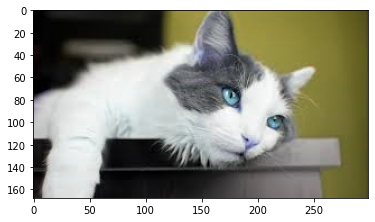

In [43]:
img = cv2.imread('/content/images (1).jpg')
plt.imshow(img)
plt.show()

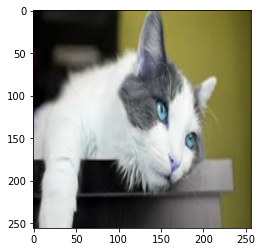

In [44]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 122ms/step


In [46]:
yhat

array([[0.13754664]], dtype=float32)

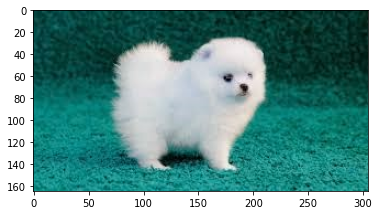

In [51]:
img = cv2.imread('/content/images (2).jpg')
plt.imshow(img)
plt.show()

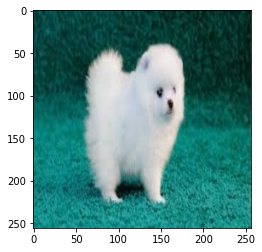

In [52]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [53]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 27ms/step


In [54]:
yhat

array([[0.8250474]], dtype=float32)

## **11. Save the Model**

In [47]:
from tensorflow.keras.models import load_model

In [48]:
model.save(os.path.join('models','Classifier.h5'))

In [49]:
new_model = load_model('/content/models/Classifier.h5')

In [50]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 63ms/step


array([[0.13754664]], dtype=float32)

**Reference**
https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb